In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.stats import norm

# Normal Random Variables

Normal distributions are important in statistics and are often used in the natural and social sciences to represent real-valued random variables whose distributions are not known.

Their importance is partly due to the **central limit theorem**. 

It states that, under some conditions, the **average** of many samples (observations) of a random variable with finite **mean** ($\mu$) and **variance** ($\sigma$) is itself a random variable—whose distribution converges to a normal distribution as the number of samples increases.

## Distribution

The probability density function (pdf) of the normal distribution is

$$f(x, \mu, \sigma) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}$$

In [5]:
# Parameters for the distribution
mu, sigma = 0, 1

In [6]:
# Calculate PDF at a specific point
pdf_at_0 = norm.pdf(0, loc=mu, scale=sigma)
print(f"PDF at 0: {pdf_at_0}")

PDF at 0: 0.3989422804014327


In [7]:
#  Calculate CDF at a specific point
cdf_at_1 = norm.cdf(3, loc=mu, scale=sigma)
print(f"CDF at 3: {cdf_at_1}")

CDF at 3: 0.9986501019683699


In [8]:
# Calculate PPF (inverse of CDF)
ppf_0_95 = norm.ppf(0.95, loc=mu, scale=sigma)
print(f"PPF at 0.95: {ppf_0_95}")

PPF at 0.95: 1.6448536269514722


## Visualization

In [3]:
# Parameters for the distribution
mu, sigma = 0, 1

# Generate 10000 random numbers with mean=0 and standard deviation=1 (standard normal distribution)
data = np.random.normal(loc=mu, scale=sigma, size=10000)

# Generate 100 random numbers with mean=0 and standard deviation=1
data_custom = np.random.normal(loc=mu, scale=sigma, size=100)

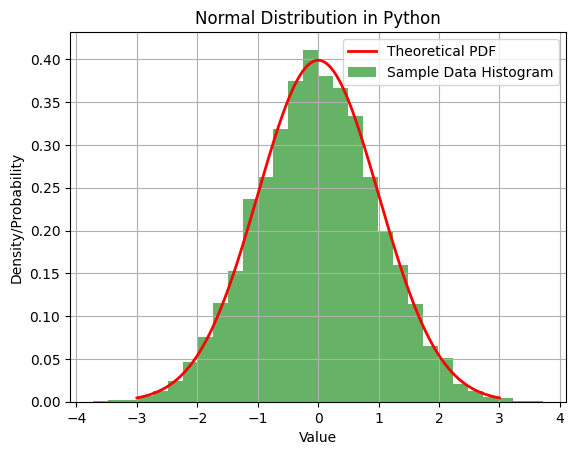

In [4]:
# Generate x values for the theoretical curve
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Calculate the PDF for the theoretical curve
pdf = norm.pdf(x, loc=mu, scale=sigma)

# Plot the theoretical curve
plt.plot(x, pdf, 'r-', lw=2, label='Theoretical PDF')

# Plot a histogram of random samples for comparison
plt.hist(data, bins=30, density=True, alpha=0.6, color='g', label='Sample Data Histogram')

plt.xlabel('Value')
plt.ylabel('Density/Probability')
plt.title('Normal Distribution in Python')
plt.legend()
plt.grid(True)
plt.show()

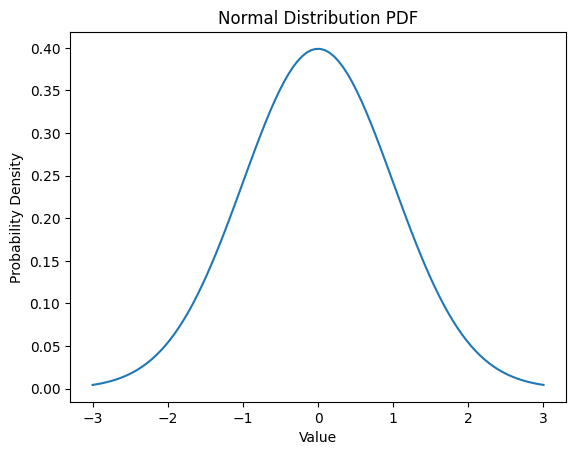

In [8]:
# Plotting the PDF
x = np.linspace(-3, 3, 100)
plt.plot(x, norm.pdf(x, loc=mean, scale=std_dev))
plt.title("Normal Distribution PDF")
plt.xlabel("Value")
plt.ylabel("Probability Density")
plt.show()

In [9]:
# Generate random variates (similar to numpy.random.normal)
random_variates = norm.rvs(loc=mean, scale=std_dev, size=100)
# print(f"Random variates from scipy: {random_variates}")

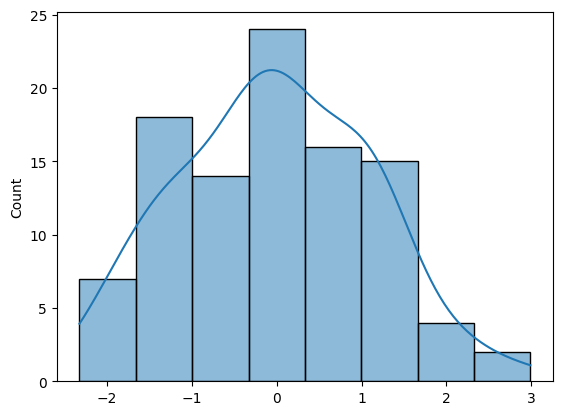

In [10]:
sns.histplot(data=random_variates, kde=True)
plt.show()

## Hypothesis testing

**Hypothesis testing** with a normal distribution determines if a sample mean significantly differs from a known population mean, assuming the population is normally distributed with a known variance. 

It involves defining null ($H_{0}$) and alternative ($H_{1}$) hypotheses, calculating a test statistic ($\bar{X}$ or $z$-score), and comparing it to a significance level ($\alpha$) to accept or reject the null hypothesis. 

## References

* [Equation Editor for online mathematics](https://editor.codecogs.com/)
* [Normal Distribution](https://en.wikipedia.org/wiki/Normal_distribution)